In [1]:
#imports
import os

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import numpy as np
import pandas as pd

import seaborn as sns
plt.style.use('seaborn-whitegrid')

%matplotlib inline  

# ========================================================
# estilos de graficos :
# >>  https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
# ========================================================
# plt.style.use('seaborn-whitegrid')
# plt.style.use('seaborn-pastel')
# plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-bright')
# plt.style.use('grayscale')
# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
# plt.style.use('dark_background')
# plt.style.use('classic')
# plt.style.use('bmh')

In [2]:
# define as pastas contendo os arquivos .in
pasta_origem = '../data_in'
arqs_in = os.listdir(pasta_origem)
dados = []
for f in arqs_in:
    print(f)
    #carrega o arquivo ".in"
    in_file = open(os.path.join(pasta_origem, f) )
#     print(in_file)
    data = in_file.readline()
    dados.append( data.replace('\n', '').split(' ') )
    in_file.close()

_data-002-10000.in
_data-005-100.in
_data-normal-1000.in
_data-005-10000.in
_data-005-1000.in
_data-001-100.in
_data-001-10000.in
_data-001-1000.in
_data-normal-10000.in
_data-002-100.in
_data-normal-100.in
_data-002-1000.in


In [3]:
len(dados)

12

In [4]:
for linha in dados:
    prob_erro = float(linha[0])
    tam_array = int(linha[1])
    numeros = []
    for val in linha[2:]:
        numeros.append(int(val))
    numeros = np.array(numeros)
    print(prob_erro, tam_array, len(numeros))#, numeros


0.02 10000 10000
0.05 100 100
0.001 1000 1000
0.05 10000 10000
0.05 1000 1000
0.01 100 100
0.01 10000 10000
0.01 1000 1000
0.0001 10000 10000
0.02 100 100
0.01 100 100
0.02 1000 1000


In [6]:
# plt.figure(figsize=[200, 100])
# font_prop = font_manager.FontProperties(size=20, style='normal', weight='bold')
# tam = [100, 1000, 10000]
# prob = [0.01]

# i=1
# for t in tam:
#     for p in prob:
#         #
#         for linha in dados:
#             prob_erro = float(linha[0])
#             tam_array = int(linha[1])
#             numeros = []
#             for val in linha[2:]:
#                 numeros.append(int(val))
#             #
#             if (tam_array == t and prob_erro == p):
#                 nbins = int(tam_array * 10 / 100)
#                 #
#                 plt.subplot(2,2,i)
#                 plt.hist(numeros, bins=nbins  )
#                 plt.title('Prob. Erro: %s - Tam. Array: %s'%(str(prob_erro), str(tam_array)), fontproperties=font_prop )
#                 i += 1
#                 #             break



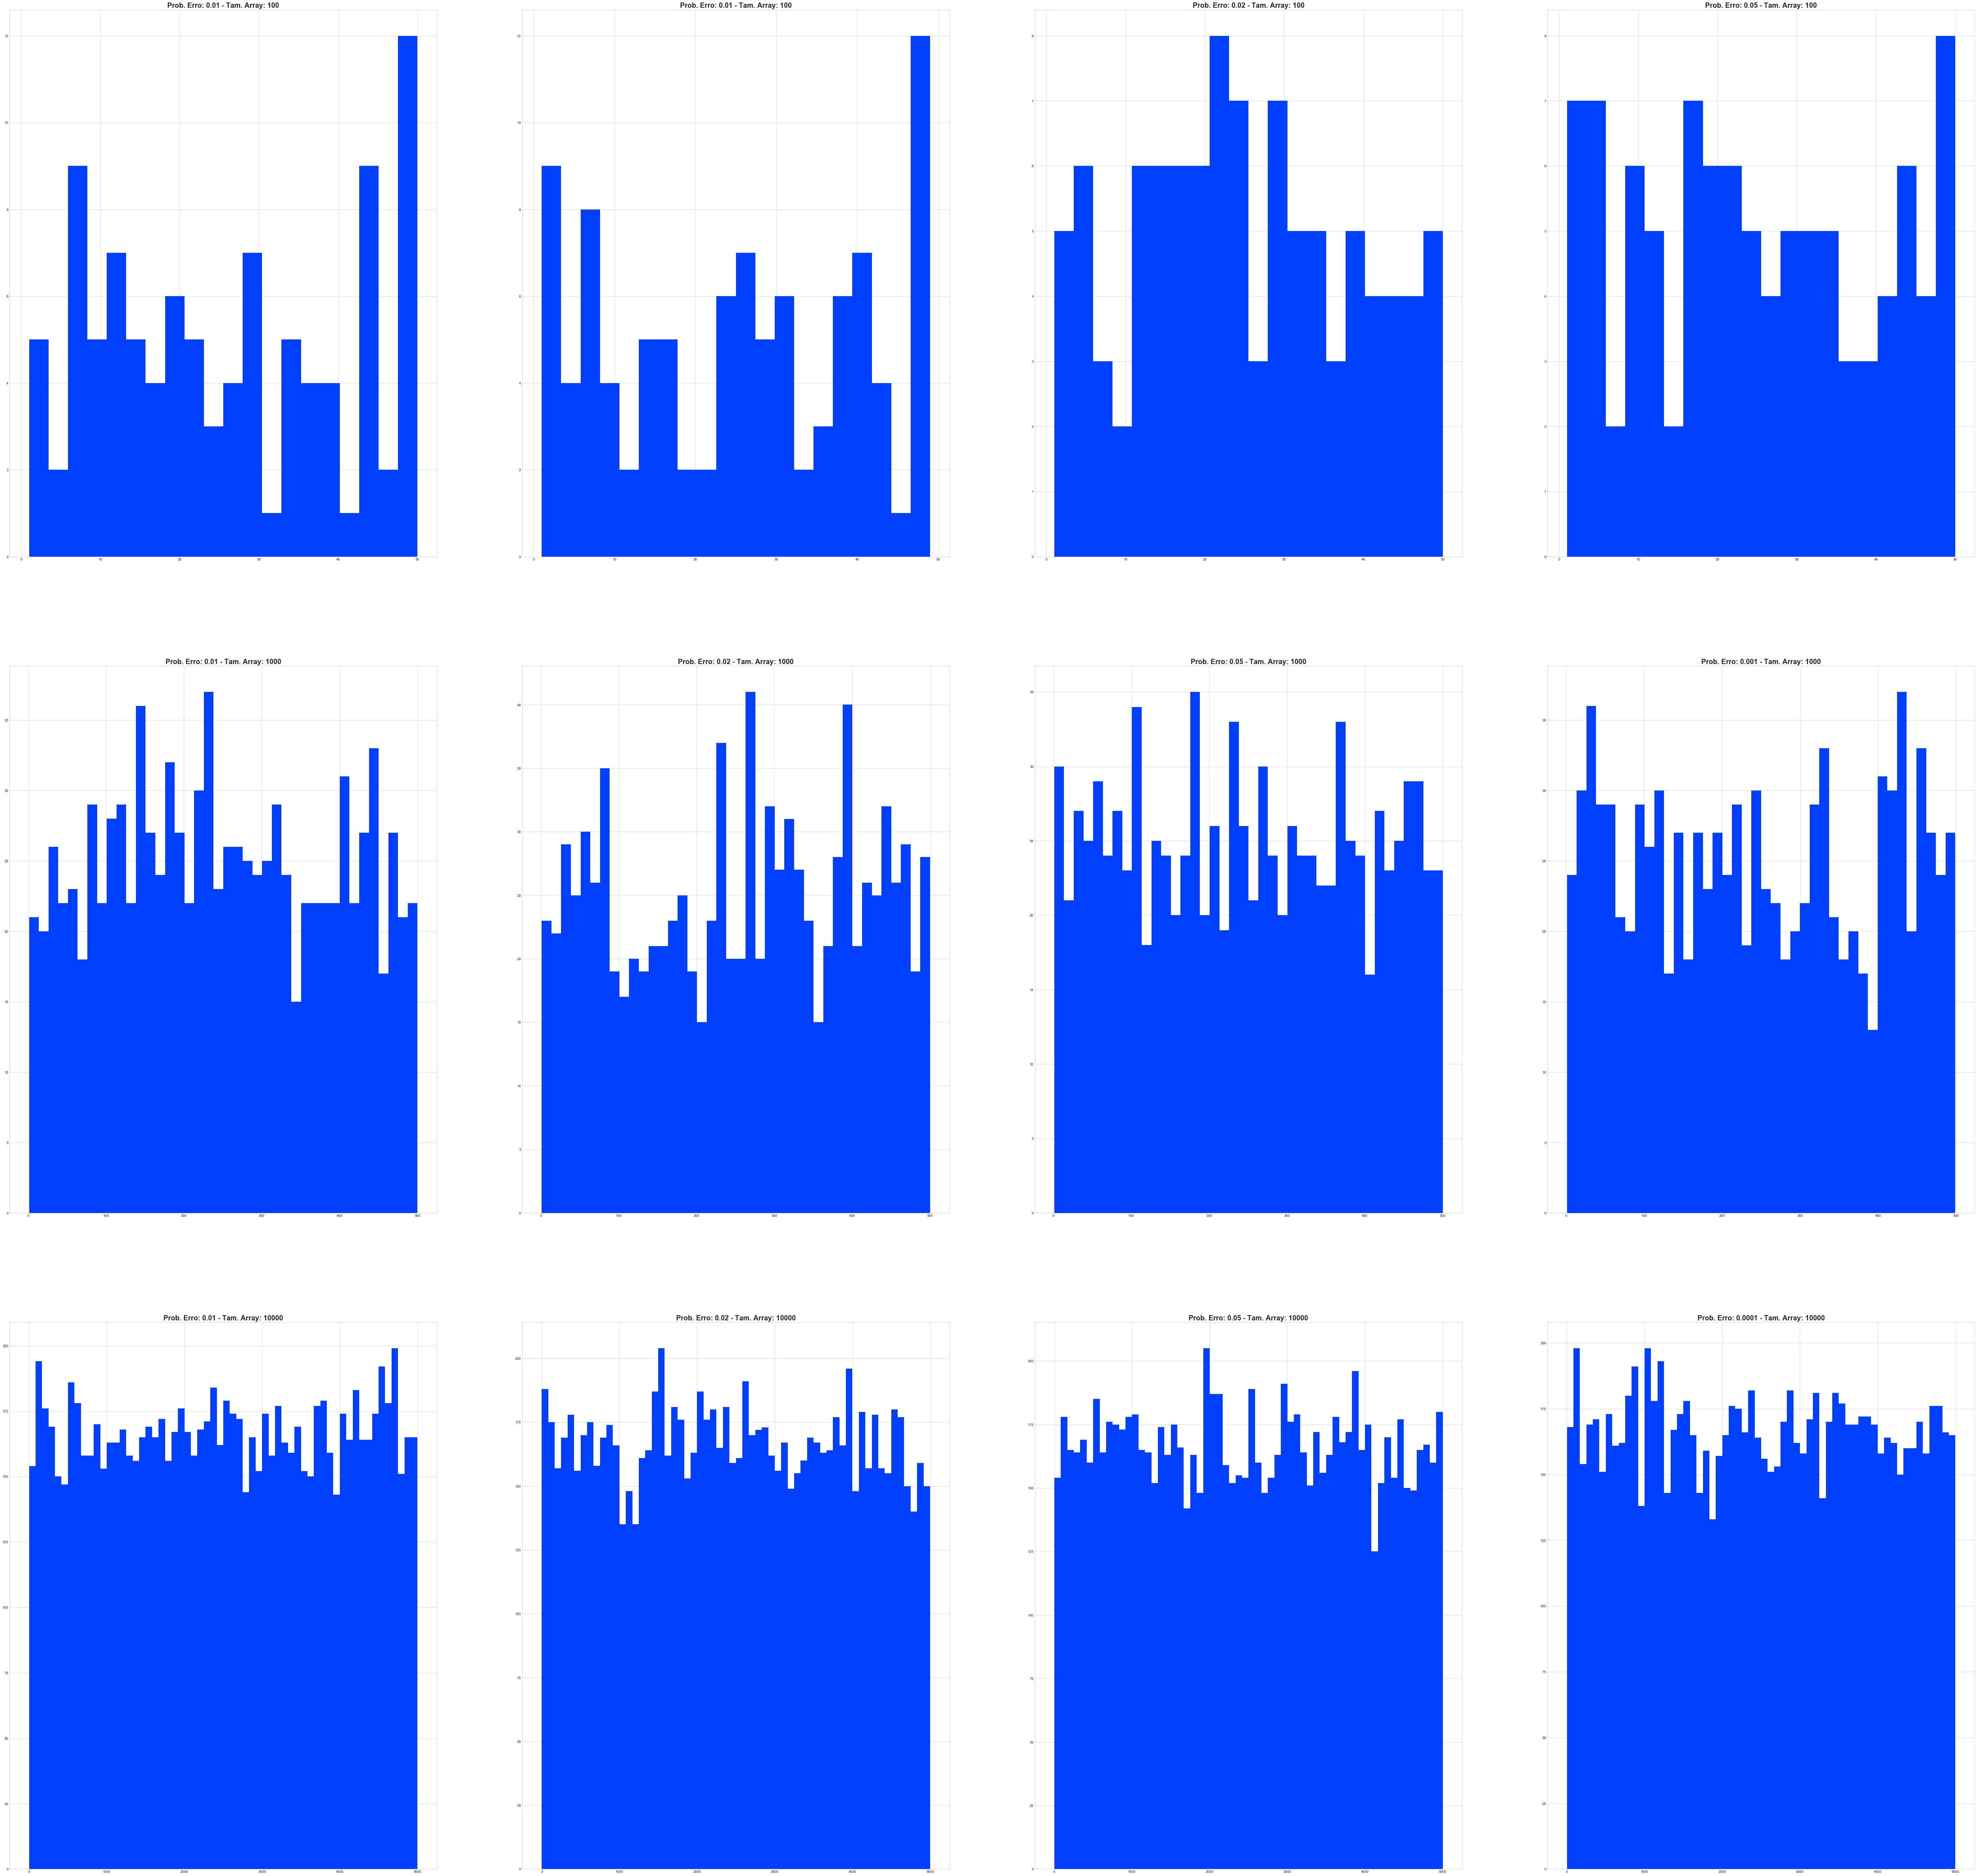

In [29]:
plt.figure(figsize=[100, 200])
font_prop = font_manager.FontProperties(size=20, style='normal', weight='bold')
tam = [100, 1000, 10000]
prob = [0.01, 0.02, 0.05, 0.001, 0.0001]
nbins = 0
i=1
for t in tam:
    nbins += 20
    for p in prob:
        #
        for linha in dados:
            prob_erro = float(linha[0])
            tam_array = int(linha[1])
            numeros = []
            for val in linha[2:]:
                numeros.append(int(val))
            #
            if (tam_array == t and prob_erro == p):
                #
                ax = plt.subplot(6,4,i)
                ax.xaxis.label.set_size(20)

                plt.hist(numeros, bins=nbins  )
                plt.title('Prob. Erro: %s - Tam. Array: %s'%(str(prob_erro), str(tam_array)), fontproperties=font_prop )
                i += 1
#             break

plt.savefig('01-Histogramas_arquivos_IN.pdf', format='pdf', orientation='landscape', papertype='letter')

In [39]:
tam = [100, 1000, 10000]
prob = [0.01, 0.02, 0.05, 0.001, 0.0001]
for t in tam:
    nbins += 20
    for p in prob:
        #
        for linha in dados:
            prob_erro = float(linha[0])
            tam_array = int(linha[1])
            numeros = []
            for val in linha[2:]:
                numeros.append(int(val))
            #
            if (tam_array == t and prob_erro == p):
                numeros = np.array(numeros)
                s = 'prob.erro:%s, tam: %s, min: %s, max: %s, mean: %.2f, std: %.2f, median: %.2f, var: %.2f' % (p, t, np.min(numeros), np.max(numeros), np.mean(numeros), np.std(numeros), np.median(numeros), np.var(numeros) )
                print(s)


prob.erro:0.01, tam: 100, min: 1, max: 50, mean: 25.90, std: 15.23, median: 24.50, var: 232.09
prob.erro:0.01, tam: 100, min: 1, max: 49, mean: 25.23, std: 15.22, median: 26.00, var: 231.58
prob.erro:0.02, tam: 100, min: 1, max: 50, mean: 24.93, std: 13.72, median: 24.00, var: 188.31
prob.erro:0.05, tam: 100, min: 1, max: 50, mean: 25.08, std: 14.76, median: 24.50, var: 217.89
prob.erro:0.01, tam: 1000, min: 1, max: 500, mean: 248.94, std: 140.31, median: 241.00, var: 19686.51
prob.erro:0.02, tam: 1000, min: 1, max: 500, mean: 256.20, std: 145.12, median: 267.00, var: 21058.58
prob.erro:0.05, tam: 1000, min: 1, max: 500, mean: 248.31, std: 144.96, median: 247.00, var: 21012.62
prob.erro:0.001, tam: 1000, min: 1, max: 499, mean: 247.53, std: 148.41, median: 242.00, var: 22024.80
prob.erro:0.01, tam: 10000, min: 1, max: 5000, mean: 2511.69, std: 1449.87, median: 2509.00, var: 2102111.01
prob.erro:0.02, tam: 10000, min: 1, max: 4999, mean: 2483.74, std: 1435.13, median: 2475.50, var: 2059

In [225]:
linha = dados[0]
prob_erro = float(linha[0])
tam_array = int(linha[1])
numeros = []
for val in linha[2:]:
    numeros.append(int(val))

# print(prob_erro, tam_array, numeros)

numeros = np.array(numeros)

np.max(numeros), np.min(numeros), np.mean(numero), np.std(numero), np.median(numero), np.var(numero)


(4999, 1, 25.899999999999999, 15.234500319997371, 24.5, 232.09000000000003)

(array([ 51.,  59.,  47.,  69.,  47.,  47.,  57.,  51.,  46.,  46.,  46.,
         46.,  59.,  57.,  57.,  49.,  44.,  47.,  47.,  51.,  53.,  56.,
         39.,  45.,  59.,  55.,  51.,  45.,  50.,  50.,  39.,  55.,  54.,
         57.,  41.,  57.,  53.,  40.,  57.,  56.,  35.,  46.,  44.,  40.,
         42.,  47.,  41.,  39.,  36.,  48.,  53.,  47.,  44.,  58.,  46.,
         41.,  58.,  45.,  60.,  60.,  63.,  59.,  67.,  50.,  46.,  46.,
         55.,  41.,  61.,  59.,  57.,  47.,  61.,  48.,  56.,  31.,  45.,
         47.,  49.,  51.,  60.,  63.,  52.,  48.,  46.,  56.,  60.,  49.,
         54.,  55.,  53.,  43.,  50.,  63.,  52.,  44.,  54.,  44.,  50.,
         52.,  54.,  48.,  40.,  61.,  56.,  57.,  51.,  47.,  60.,  48.,
         46.,  56.,  50.,  46.,  50.,  61.,  54.,  53.,  36.,  55.,  48.,
         44.,  44.,  50.,  48.,  58.,  47.,  50.,  44.,  39.,  41.,  44.,
         47.,  48.,  54.,  46.,  66.,  39.,  43.,  56.,  55.,  44.,  47.,
         59.,  44.,  49.,  42.,  57., 

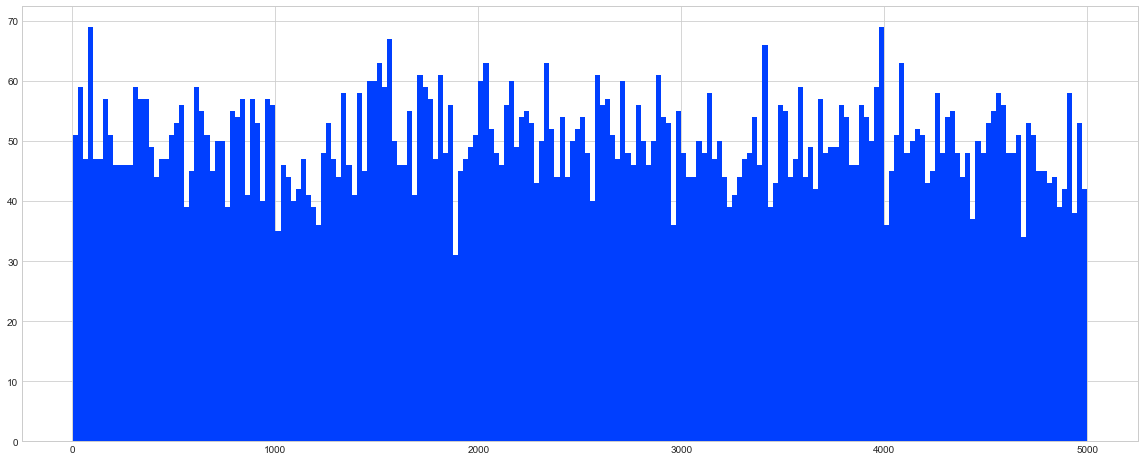

In [219]:
plt.figure(figsize=[20,8])
b = int(tam_array * 2/100)
plt.hist(numeros, bins=b  )

(array([ 51.,  59.,  47.,  69.,  47.,  47.,  57.,  51.,  46.,  46.,  46.,
         46.,  59.,  57.,  57.,  49.,  44.,  47.,  47.,  51.,  53.,  56.,
         39.,  45.,  59.,  55.,  51.,  45.,  50.,  50.,  39.,  55.,  54.,
         57.,  41.,  57.,  53.,  40.,  57.,  56.,  35.,  46.,  44.,  40.,
         42.,  47.,  41.,  39.,  36.,  48.,  53.,  47.,  44.,  58.,  46.,
         41.,  58.,  45.,  60.,  60.,  63.,  59.,  67.,  50.,  46.,  46.,
         55.,  41.,  61.,  59.,  57.,  47.,  61.,  48.,  56.,  31.,  45.,
         47.,  49.,  51.,  60.,  63.,  52.,  48.,  46.,  56.,  60.,  49.,
         54.,  55.,  53.,  43.,  50.,  63.,  52.,  44.,  54.,  44.,  50.,
         52.,  54.,  48.,  40.,  61.,  56.,  57.,  51.,  47.,  60.,  48.,
         46.,  56.,  50.,  46.,  50.,  61.,  54.,  53.,  36.,  55.,  48.,
         44.,  44.,  50.,  48.,  58.,  47.,  50.,  44.,  39.,  41.,  44.,
         47.,  48.,  54.,  46.,  66.,  39.,  43.,  56.,  55.,  44.,  47.,
         59.,  44.,  49.,  42.,  57., 

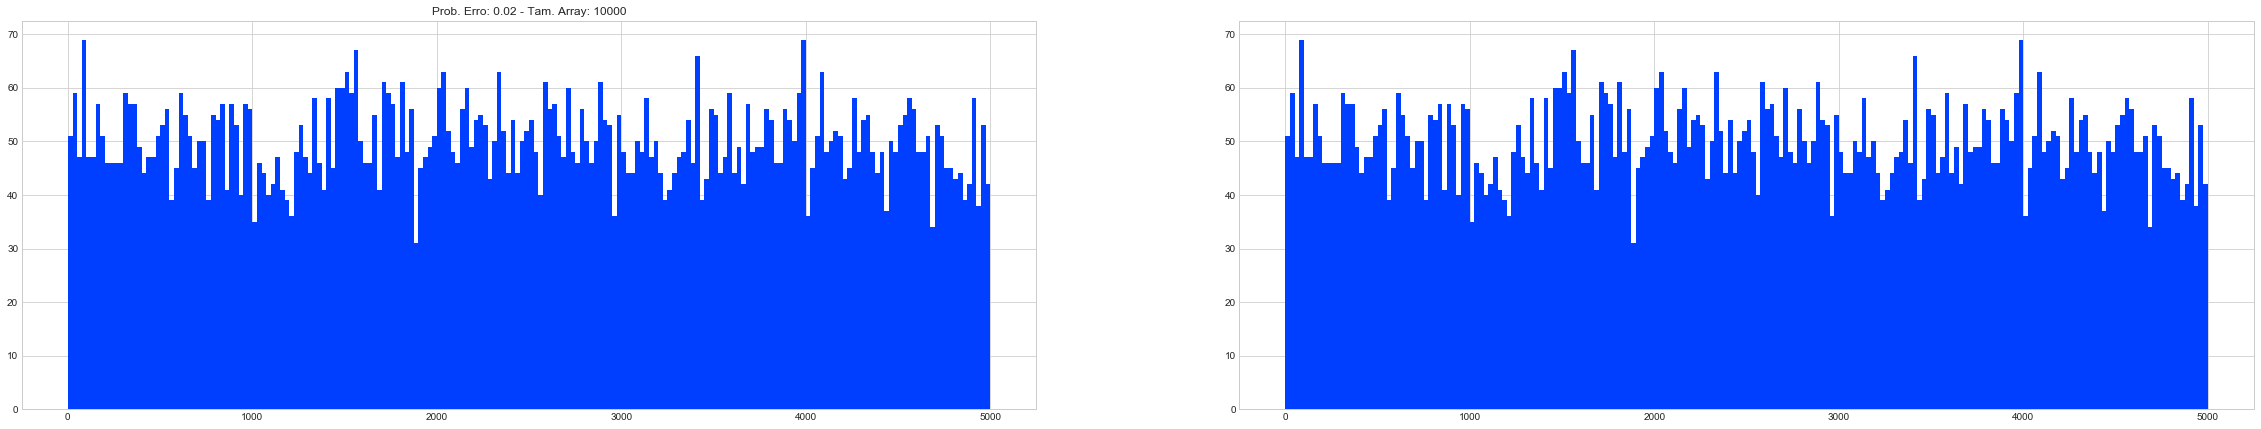

In [239]:
plt.figure(figsize=[40, 50])
plt.subplot(6,2,1)
plt.hist(numeros, bins=b  )
plt.title('Prob. Erro: %s - Tam. Array: %s'%(str(prob_erro), str(tam_array)) )
plt.subplot(6,2,2)
plt.hist(numeros, bins=b  )

In [79]:
s = prob_erro
print('%s' % s.to_string)

<bound method DataFrame.to_string of Empty DataFrame
Columns: []
Index: [0.01]>
